In [1]:
from keras.utils import to_categorical
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
#cifar10 dataset [갯수, H, W, C] 구성
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [4]:
NUM_CLASSES=10

#이미지 정규화
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

#원핫인코딩벡터로 변환
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

### keras의 신경망 구조 정의 2가지 방법
#### Sequential 모델
- 일렬로 층을 쌓은 네트워크
```python
from keras.models import Sequential
from keras.layers import Flatten, Dense
model= Sequential([
    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
```

#### 함수형 API
- 가지가 있는 네트워크

```python
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer= Input(shape=(32,32,3))
x= Flatten()(input_layer)
x= Dense(units=200, activation='relu')(x)
x=Dense(units=150, activation= 'relu')(x)
output_layer= Dense(units=10, activation = 'softmax')(x)
model= Model(input_layer , output_layer)
```

- INPUT: 튜플로 넣어줘야함
(cf.ToTensor() : pytorch)
- Flatten: 하나의 벡터(DENSE 해주기 위함)
- Dense: full-connected되는 유닛(연결마다 가중치 동반)

```python
model.summary()
```

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model= Sequential([
    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [6]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer= Input(shape=(32,32,3))
x= Flatten()(input_layer)

x= Dense(units=200, activation='relu')(x)
x=Dense(units=150, activation= 'relu')(x)

output_layer= Dense(units=10, activation = 'softmax')(x)

model= Model(input_layer , output_layer)

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일
### Loss Function & Optimizer
- 손실함수
    - MSE: 회귀, 연속적인 값 예측
    - categorical_crossentropy: 여러 class 중 하나에 속함
    - binary_crossentropy: 하나의 출력 유닛(이진분류), 샘플이 여러개의 클래스에 속할 수 있는(다중 레이블 분류)
    <br><br>
- optimizer:
손실함수의 그레이디언트 기반으로 신경망의 가중치 업데이트. lr이 클수록 훈련한 step에서 가중치를 크게 바꿈

In [8]:
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

## 모델 훈련

In [9]:
model.fit(x_train, y_train, batch_size=32, epochs=30, shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8517 - accuracy: 0.3327
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6697 - accuracy: 0.4016
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5908 - accuracy: 0.4349
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5364 - accuracy: 0.4546
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4982 - accuracy: 0.4669
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4656 - accuracy: 0.4782
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4393 - accuracy: 0.4866
Epoch 8/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4145 - accuracy: 0.4956
Epoch 9/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3953 - accuracy: 0.5041
Epoch 10/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.378

## 모델 평가
[손실값, 정확도]

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.4313 - accuracy: 0.5040


[1.4313316345214844, 0.5040000081062317]

### 시각화

In [11]:
import numpy as np
CLASSES=np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
preds=model.predict(x_test)
preds_single= CLASSES[np.argmax(preds, axis=-1)]
actual_single=CLASSES[np.argmax(y_test, axis=-1)]


Bad key "text.kerning_factor" on line 4 in
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


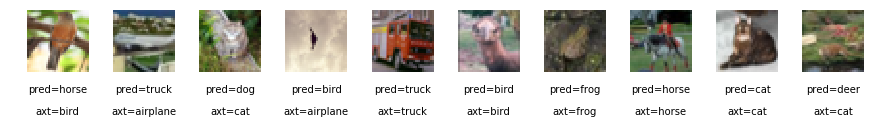

In [12]:
import matplotlib.pyplot as plt
n_to_show=10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img= x_test[idx]
    ax=fig.add_subplot(1, n_to_show, i+1) 
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred=' +str(preds_single[idx]), fontsize=10, ha='center',transform= ax.transAxes)
    ax.text(0.5, -0.7, 'axt=' +str(actual_single[idx]), fontsize=10, ha='center', transform= ax.transAxes)
    ax.imshow(img)

# 합성곱 신경망 Convolutional Layer 사용

### Conv1, Conv2 : 특징 추출
### Flatten, Dense : 분류단
- stride, padding 사용
- layer크기, batch_size, epochs 사용
- activation

In [13]:
from keras.layers import Conv2D
input_shape = Input(shape=(64,64,1))
conv_layer_1 = Conv2D(filters =10, kernel_size=(3,3), strides=2, padding='same')(input_layer)
conv_layer_2 =Conv2D(filters= 20, kernel_size=(3,3), strides =2, padding= 'same')(conv_layer_1)
flatten_layer= Flatten()(conv_layer_2)
output_layer= Dense(units =10, activation='softmax')(flatten_layer)
model= Model(input_layer, output_layer)

In [14]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                12810     
Total params: 14,910
Trainable params: 14,910
Non-trainable params: 0
_________________________________________________________________


### 모델 성능 향상 (과적합 막기)
#### 배치 정규화(momentum = 0.9) 정해주기
- 가중치를 일정한 범위 안에서 유지해주기
- BAD(Batch_normalization, Activation, Dense)
#### Dropout
- 최근에는 많이 사용 안함, 배치정규화 대신 사용

In [15]:
## 전체 Layer
from keras.layers import BatchNormalization, LeakyReLU, Dropout, Activation
NUM_CLASSES = 10
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides =2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides =1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides =2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

In [16]:
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

model.fit(x_train, y_train, batch_size = 32, epochs =10, shuffle= True)

Epoch 1/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.5511 - accuracy: 0.4554
Epoch 2/10
1563/1563 [==============================] - 112s 71ms/step - loss: 1.1628 - accuracy: 0.5885
Epoch 3/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.0182 - accuracy: 0.6422
Epoch 4/10
1563/1563 [==============================] - 115s 74ms/step - loss: 0.9282 - accuracy: 0.6762
Epoch 5/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.8661 - accuracy: 0.7010
Epoch 6/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.8116 - accuracy: 0.7192
Epoch 7/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.7671 - accuracy: 0.7347
Epoch 8/10
1563/1563 [==============================] - 129s 83ms/step - loss: 0.7282 - accuracy: 0.7462
Epoch 9/10
1563/1563 [==============================] - 137s 88ms/step - loss: 0.6979 - accuracy: 0.7548
Epoch 10/10
1563/1563 [==============================] 

In [17]:
model.evaluate(x_test, y_test, batch_size =1000)

10/10 [==============================] - 4s 376ms/step - loss: 0.7857 - accuracy: 0.7311


[0.7857319116592407, 0.7311000227928162]